In [12]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [6]:
# let's read the dataset 
data = pd.read_pickle('clean_corpus_with_full_names.pkl')

In [7]:
# preview data
data

,transcript,full_name
ali,ladies and gentlemen please welcome to the sta...,Ali Wong
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik
bill,all right thank you thank you very much thank...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle
hasan,what’s up davis what’s up i’m home i had to ...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan
john,armed with boyish charm and a sharp wit the fo...,John Mulaney
louis,introfade the music out let’s roll hold there ...,Louis C.K.


- we have the corpus of transcripts by all comedians

In [10]:
# add polarity and subjectivity for all the text data in the dataset

# UDFs for extracting polarity and subjectivity
pol = lambda x : TextBlob(x).sentiment.polarity
sub = lambda x : TextBlob(x).sentiment.subjectivity

# add them to dataset
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)

# preview dataset
data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.066938,0.482403
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.054471,0.559077
bill,all right thank you thank you very much thank...,Bill Burr,0.017374,0.536474
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.080360,0.554117
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,-0.003429,0.513205
hasan,what’s up davis what’s up i’m home i had to ...,Hasan Minhaj,0.091424,0.454956
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.048750,0.529328
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.010167,0.551108
john,armed with boyish charm and a sharp wit the fo...,John Mulaney,0.079627,0.483822
louis,introfade the music out let’s roll hold there ...,Louis C.K.,0.058992,0.516348


Text(0, 0.5, '< - Facts - - - - - Opinion - >')

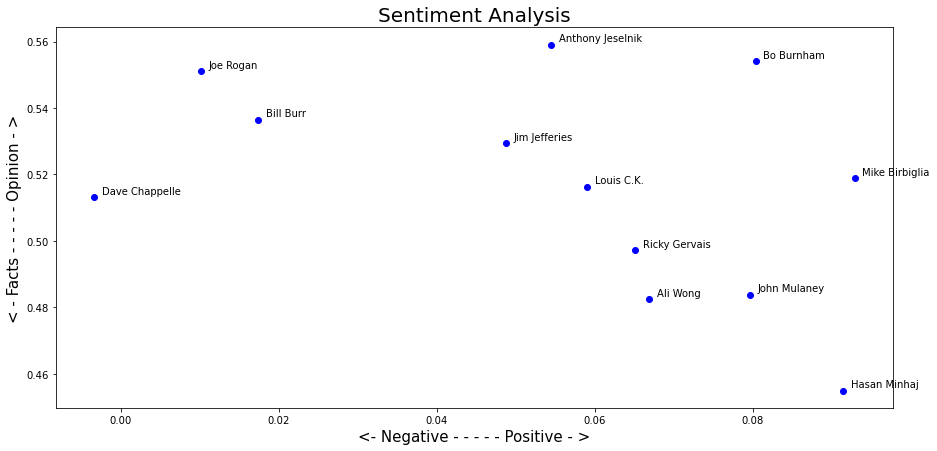

In [31]:
# plot results
plt.figure(figsize=(15,7))

for index, comedian in enumerate(data.index):
    x = data['polarity'].loc[comedian]
    y = data['subjectivity'].loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+0.001, data['full_name'][index], fontsize=10)
    
plt.title("Sentiment Analysis", fontsize=20)
plt.xlabel("<- Negative - - - - - Positive - >", fontsize=15)
plt.ylabel("< - Facts - - - - - Opinion - >", fontsize=15)

## Sentiment over time
Instead of looking at the sentiment of the whole comedy routine, let us split it over multiple time ranges and analyse their sentiments

In [32]:
# split routine into 10 parts
import numpy as np
import math

# UDF to split transcript
def split_text(text, n=10):
    '''
    Takes in a string of text and splits it into n equal parts
    '''
    
    # calculate length of text, size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length/n)
    start = np.arange(0, length, size)
    
    # pull out equally size pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [33]:
# preview dataset
data

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.066938,0.482403
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.054471,0.559077
bill,all right thank you thank you very much thank...,Bill Burr,0.017374,0.536474
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.080360,0.554117
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,-0.003429,0.513205
hasan,what’s up davis what’s up i’m home i had to ...,Hasan Minhaj,0.091424,0.454956
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.048750,0.529328
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.010167,0.551108
john,armed with boyish charm and a sharp wit the fo...,John Mulaney,0.079627,0.483822
louis,introfade the music out let’s roll hold there ...,Louis C.K.,0.058992,0.516348


In [34]:
# let's create a list to hold all the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee in like ten minutes but thank you everybody so much for coming um… it’s a very exciting day for me it’s been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that i’m getting older because now when i see an  girl my automatic thought… is “fuck you” “fuck you i don’t even know you but fuck you” ‘cause i’m straight up jealous i’m jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they don’t have insomnia yet they don’t know what it’s lik

In [35]:
len(list_pieces)

12

In [37]:
list_pieces[0][0]

'ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with ’cause i have to pee in like ten minutes but thank you everybody so much for coming um… it’s a very exciting day for me it’s been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that i’m getting older because now when i see an  girl my automatic thought… is “fuck you” “fuck you i don’t even know you but fuck you” ‘cause i’m straight up jealous i’m jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they don’t have insomnia yet they don’t know what it’s like 

In [38]:
# calculate the polarity of each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.10653174603174606,
  0.05554232804232803,
  0.09261867625838215,
  0.08788023088023086,
  -0.016826765188834157,
  0.08848808912368235,
  0.05766584354612524,
  0.08647907647907646,
  0.028597343699384534,
  0.07318211068211068],
 [0.13933883477633482,
  -0.061772017045454555,
  -0.044710012210012216,
  0.025323547979798005,
  0.15882883456412872,
  0.09026683087027915,
  0.08985248447204972,
  0.10573721340388005,
  -0.03489183818131191,
  0.06888415404040403],
 [-0.028126222542889198,
  0.00038528788528789144,
  0.025985487313612294,
  0.014114173808051335,
  -0.02224945887445888,
  0.061709273182957394,
  0.03772746427613681,
  -0.019436107776443914,
  -0.004852416622079563,
  0.10673667265648401],
 [0.18330572808833684,
  -0.018540202966432464,
  -0.037448107448107434,
  0.09236773935569115,
  0.04996406109613656,
  0.02052687150248125,
  -0.034410430839002255,
  0.04574592074592076,
  0.21744756417291625,
  0.24218253968253964],
 [-0.05073496534764142,
  -0.05732323232323231,


Text(0.5, 1.0, 'Ali Wong')

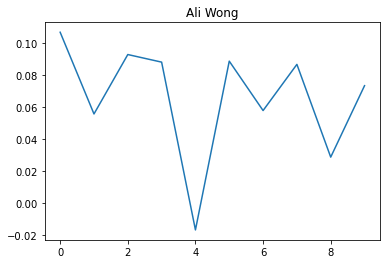

In [40]:
# let's plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'][0])

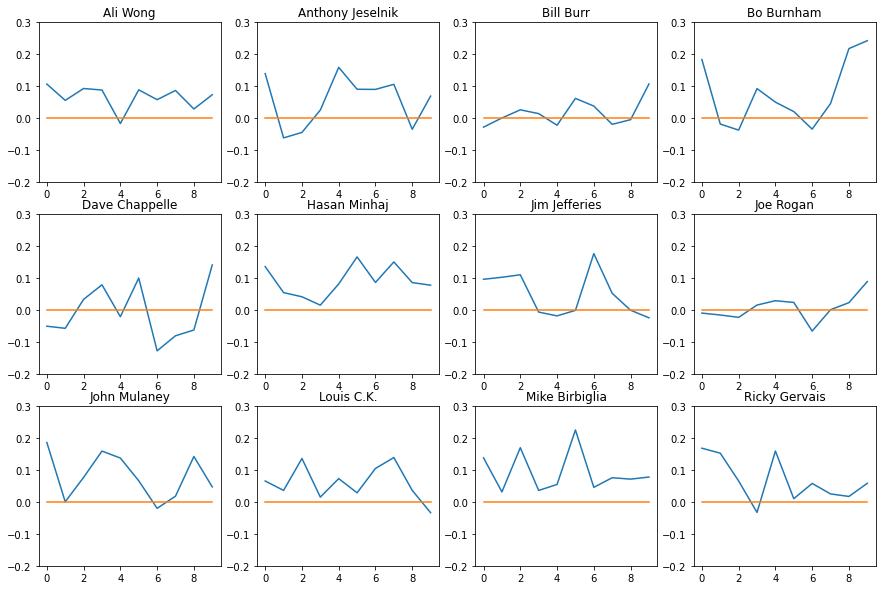

In [41]:
# let's plot for all comedians
plt.figure(figsize=(15,10))

for index, comedian in enumerate(data.index):
    plt.subplot(3,4,index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)